# Understanding What Filter/Kernel and MaxPooling dowing under the hood

In [101]:
import os
import math
import shutil
import requests
import numpy as np
from PIL import Image
from io import BytesIO
import matplotlib.pyplot as plt

Understanding import libraries use case

In [102]:
# help(os)
# help(math)
# help(shutil)
# help(Image)
# help(BytesIO)

# Utility

In [103]:
def open_and_resize(file, resize=(500, 500)):
    if file.startswith('http'):
        response = requests.get(file)
        image = Image.open(BytesIO(response.content)).convert('RGB')
    else:
        image = Image.open(file).convert('RGB')
    w, h = image.size
    left = int( (w-h) / 2 if w > h else 0)
    upper = int( (w-h) / 2 if h > w else 0)
    right = int( w - ( (w-h) / 2) if w > h else h)
    lower = int( h - ( (w-h) / 2) if h > w else h)
    image = image.crop((left, upper, right, lower))
    image.thumbnail(resize)
    return image

Understanding the function

In [104]:
# help(str.startswith)
# help(requests.get)

# test = requests.get('https://www.cs.toronto.edu/~lczhang/360/lec/w04/convnet.html#:~:text=Parameters%20of%20a%20Convolutional%20Layer&text=There%20is%20one%20bias%20for,Nevertheless%2C%20the%20biases%20are%20there.')
# help(test.content)
# test.content

# help(Image.open)

# test_image = requests.get('https://cdn.prod.website-files.com/62d84e447b4f9e7263d31e94/6557420216a456cfaef685c0_6399a4d27711a5ad2c9bf5cd_ben-sweet-2LowviVHZ-E-unsplash-1.jpg')
# test_image.content
# plt.imshow(test_image.content)
# print(Image.open(BytesIO(test_image.content)).convert)
# help(BytesIO(test_image.content))
# help(Image.open(BytesIO(test_image.content)).convert)

# test_image = requests.get('https://cdn.prod.website-files.com/62d84e447b4f9e7263d31e94/6557420216a456cfaef685c0_6399a4d27711a5ad2c9bf5cd_ben-sweet-2LowviVHZ-E-unsplash-1.jpg')
# help(Image.open(BytesIO(test_image.content)).crop)
# help(Image.open(BytesIO(test_image.content)).thumbnail)


# Convolution Filter

In [105]:
def conv2d(X, W, pad=1, stride=1):
    # Filter/Kernel Size
    f, f, _ = W.shape
    n_C = 1

    # New Output Volume
    n_H = int(np.floor(X.shape[0] - f + 2 * pad) / (stride * 1.)) + 1
    n_W = int(np.floor(X.shape[1] - f + 2 * pad) / (stride * 1.)) + 1

    Z = np.zeros((n_H, n_W, n_C))

    # padding
    x = np.pad(X, ((pad, pad), (pad, pad), (0, 0)), 'constant', constant_values=(0, 0))
    for h in range(n_H):
        for w in range(n_W):
            for c in range(n_C):
                vert_start = h * stride
                vert_end = vert_start + f
                horiz_start = w * stride
                horiz_end = horiz_start + f

                Z[h, w, c] = np.sum(W[:, :, c] * x[vert_start:vert_end, horiz_start:horiz_end, :])
    return Z

# Max Pooling

In [112]:
def max_pooling2d(X, pool_size=2, stride=2):
    # New Output Volume
    n_H = int(np.floor(X.shape[0] - pool_size) / (stride * 1.)) + 1
    n_W = int(np.floor(X.shape[1] - pool_size) / (stride * 1.)) + 1
    n_C = X.shape[2]

    Z = np.zeros((n_H, n_W, n_C))
    for h in range(n_H):
        for w in range(n_W):
            for c in range(n_C):
                vert_start = h * stride
                vert_end = vert_start + pool_size
                horiz_start = w * stride
                horiz_end = horiz_start + pool_size

                Z[h, w, c] = np.amax(X[vert_start:vert_end, horiz_start:horiz_end, c])
    return Z

# Filter/Kernel

In [121]:
w = np.zeros((3, 3, 3))
t = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]) / 3
# t = np.array([[0, 0, 0], [0, 3., 0], [0, 0, 0]]) / 3
w[:,:,0] = t
w[:,:,1] = t
w[:,:,2] = t

# Example

<PIL.Image.Image image mode=RGB size=764x910 at 0x10BD89010>


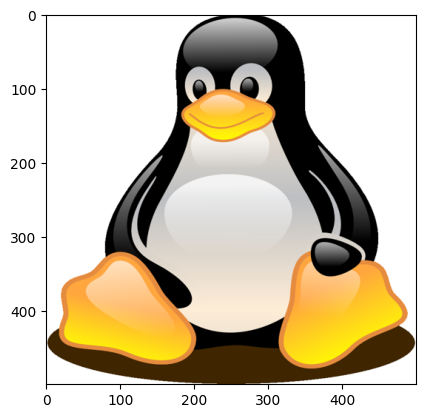

In [122]:
open_and_resize('https://upload.wikimedia.org/wikipedia/commons/a/ac/NewTux.png')

response = requests.get('https://upload.wikimedia.org/wikipedia/commons/a/ac/NewTux.png').content
image = Image.open(BytesIO(response)).convert('RGB')
print(image)
re_image = image.resize((500, 500))
plt.imshow(image)
plt.imshow(re_image)

In [123]:
# Convert image to np array
data = np.asarray(image, dtype="int32")
n = conv2d(data, w)

(910, 764, 1)


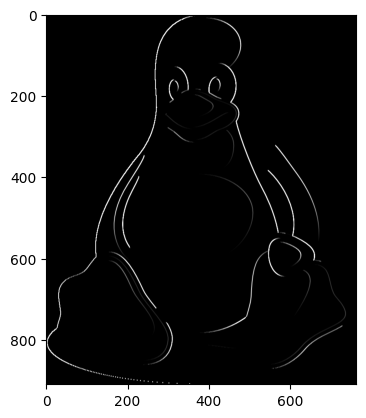

In [124]:
plt.imshow(Image.fromarray(n[:,:,0]).convert("L"), cmap="gray")
print(n.shape)

(453, 380, 1)


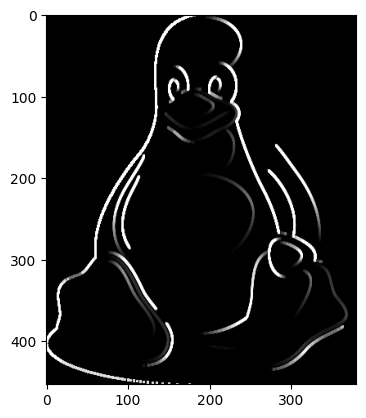

In [125]:
x = max_pooling2d(n, pool_size=5)
plt.imshow(Image.fromarray(x[:,:,0]).convert("L"), cmap='gray')
print(x.shape)